# Prerequisites for running the notebook

A working jupyter environment with some basic libraries numpy, matplotlib are expected. A specific package called `ipympl` is required for animation.

**Disclaimer: Restart the kernel and run all cells, when running into any errors.**

# Importing Libraries

We import `numpy`, `matplotlib.pyplot` and `FuncAnimation` function from `matplotlib.pyplot`.

In [1]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Setting up the plotting space

We intitalize our interative plotting space using `subplots()` along with the list of data points to plot.

The `init()` function sets the limits for the plot. The `update()` funciton is the function passed into the `FuncAnimation` which calls it every time depending on the number frames to morph the image accoedingly.

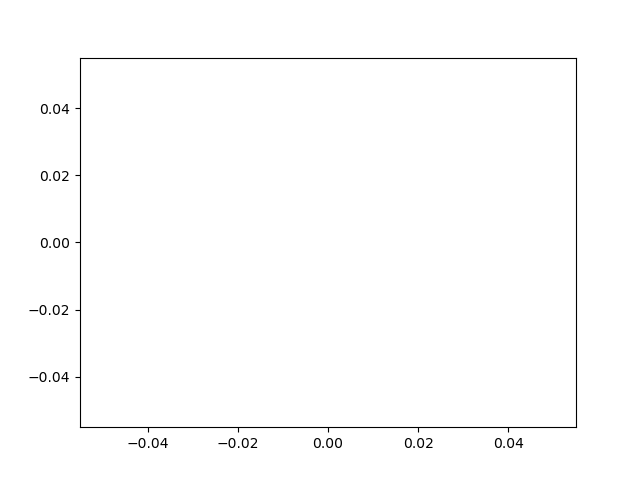

In [2]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r')

def init():
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    return ln,

def update(frame):
    integer = int(frame)
    you = frame - integer
    xdata1, ydata1 = morph(xarr[integer+1], yarr[integer+1], xarr[integer], yarr[integer], you)
    ln.set_data(xdata1, ydata1)
    return ln,

# Polygon Generation

The `polyfon_gen()` function gives 2520 points on a polygon of the specified size. This is achieved using polar coordinates, for calculating the locations of vertices.

In [3]:
def polyfon_gen(n):
    xa=[1]
    ya=[0]
    theta=2*np.pi/n
    for i in range(1,n):
        xa.append(np.cos(theta*i))
        ya.append(np.sin(theta*i))
    xa.append(1.0)
    ya.append(0.0)

    x_final = []
    y_final = []
    for i in range(n):
        x = []
        y = []
        if i == int(n/2) and n%2 != 0:
            y = list(np.linspace(ya[i], ya[i+1], int(2520/n)))
            for j in range(len(y)):
                x.append(xa[i])
                x_final.append(x[j])
                y_final.append(y[j])
        else:
            m = (ya[i+1] - ya[i])/(xa[i+1] - xa[i])
            x = list(np.linspace(xa[i], xa[i+1], int(2520/n)))
            for j in range(len(x)):
                y.append(m*(x[j] - xa[i]) + ya[i])
                x_final.append(x[j])
                y_final.append(y[j])
    return np.array(x_final), np.array(y_final)


# Morphing

We define the `morph()` function to find the intermediate locations of the points which is recursively called in the `update()` function.

The global variables `xarr` and `yarr` which stores list of lists of all the necesaary points on teh polygons.

We call the `FuncAnimation` function with the subplot, update function, init function and the frames, which is the hardcoded to a list between (0, 16) that runs through and back all teh polygons. The number of points in the list of frames is a hyperparameter which we can increase for a slower morph.


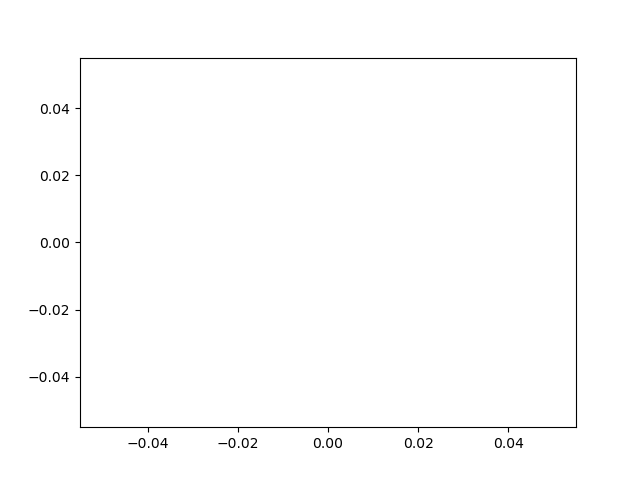

In [4]:
def morph(x1, y1, x2, y2, alpha):
    xm = alpha * x1 + (1-alpha) * x2
    ym = alpha * y1 + (1-alpha) * y2
    return xm, ym

xarr = []
yarr = []
for i in range(8):
    tempx, tempy = polyfon_gen(i+3)
    xarr.append(tempx)
    yarr.append(tempy)
    
for i in range(7, -1, -1):
    tempx, tempy = polyfon_gen(i+3)
    xarr.append(tempx)
    yarr.append(tempy)

ani = FuncAnimation(fig, update, frames=np.linspace(0, 16, 512),
init_func=init, blit=True, interval=10, repeat=True)

plt.show()

# End Result

We get a morph animation through regular polygons from triangle to decagon and back to triangle.

This is animation might be different from the given animation, beacause the points defined on the polygon are successively mapped to new points, unlike in the given animation the vertices are split and only these vertices are mapped to new locations.